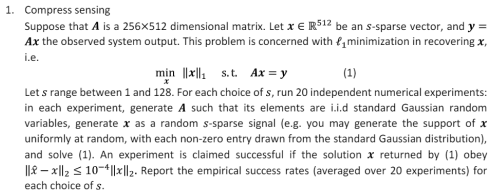

As this problem requires following the instructions piece by piece, I will simply run the code, without much commentary, which is not needed. Final commentary will be given with shown results.

Note that the solver function is given in sample code, and solves using cvxpy. To create X0, I first create a sparse object, which has random values of 0s and 1s to make a sparse vector. Then, I create a random vector of random values, and multiply it with the sparse vector, which 0s out random values in the randomized value vector to create a random-sparse vector.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.sparse import random
from scipy.optimize import minimize
import cvxpy as cp
np.random.seed(1993)

In [2]:
def l1eq_pd(x0, A, b, verbose=False):
    '''Solves min_x ||x||_1 st Ax = b via CVXPY
    
    '''
    n = (len(x0),1)
    x = cp.Variable(n, complex=True)
    objective = cp.Minimize(cp.norm(x, 1))
    constraints = [A@x == b]
    prob = cp.Problem(objective, constraints)
    # SCS is waay faster than default ECOS. Dunno why.
    result = prob.solve(solver='SCS', verbose=verbose)
    return x.value

In [3]:
s = range(1,129)

final_scores = []
for i in s:
    s_temp = []
    for q in range(20):
        A = np.random.normal(size=(256,512))
        sparse = random(512, 1, density=i/512, data_rvs=np.ones).toarray()
        r = np.random.normal(0,1,size=512)
        x0 = (sparse.T*r).T
        y = A@x0
        solve = l1eq_pd(x0,A,y)
        score = np.linalg.norm(solve-x0) <= 10**(-4)*np.linalg.norm(x0)
        s_temp.append(score)
    final_scores.append(np.mean(s_temp))

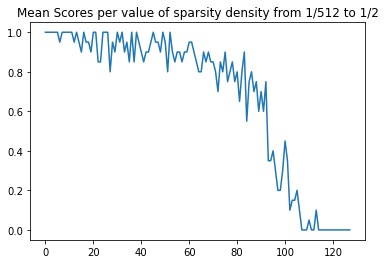

In [4]:
plt.plot(final_scores)
plt.title('Mean Scores per value of sparsity density from 1/512 to 1/2')
plt.show()

As can be seen, the sparser the original x0 is, the worse the average success rate is, which makes sense. We see success really drop off toward sparsity densities of about 80/512, or 5/32. Then, it takes a sharp dive toward nearly 0 accuracy, as sparsity density moves closer and closer to 1/2. (Note, sparsity density is the fraction of total values that will result in 0. The higher the density, the sparser the vector). 